In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from utils.streams import Dataset

%matplotlib inline
plt.style.use('ggplot')

from scipy import signal

In [40]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [41]:
stream_root_folder = r"C:\Users\neurogears\Desktop\EC_datasets\PupilBenchmark_2022_09_29_10_59_55"
dataset = Dataset(stream_root_folder)
dataset.populate_streams(autoload = False)


#Load necessary streams for the test
dataset.streams.BioData.Set.load() #Connected to the LED burned in the camera's image

dataset.streams.PupilLabs.LSLSampleArray.load()
dataset.streams.PupilLabs.LSLSampleTime.load()

pupilcsv = pd.read_csv(stream_root_folder + "\\" + "Invisible\\2022-09-29_10-59-49-04aa68c6\\lum_right.csv", header=None)
pupilcsv.columns = ["lum"]

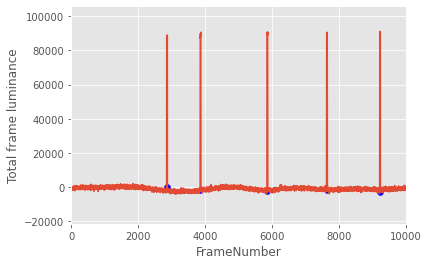

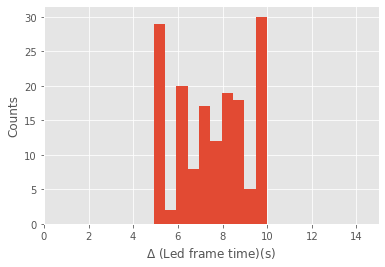

In [42]:
fps = 200

filt_lum = butter_highpass_filter(pupilcsv["lum"].values, cutoff= 0.1, fs = 200)



thr = 20e3

ttl = (filt_lum > thr).astype(float)
rising_edge = np.where(np.diff(ttl) == 1)[0]

plt.figure()
plt.plot(filt_lum)
plt.scatter(rising_edge, filt_lum[rising_edge], c='blue')
plt.xlim(0, 10e3)
plt.xlabel("FrameNumber")
plt.ylabel("Total frame luminance")
plt.show()

plt.figure()
plt.hist(np.diff(rising_edge) / fps)
plt.xlim((0,15))
plt.xlabel("$\Delta$ (Led frame time)(s)")
plt.ylabel("Counts")
plt.show()

In [54]:
t_harp = ((dataset.streams.BioData.Set.data.index - dataset.streams.BioData.Set.data.index[0])/np.timedelta64(1, 's')).values * fps
t_camera = (rising_edge - rising_edge[0])


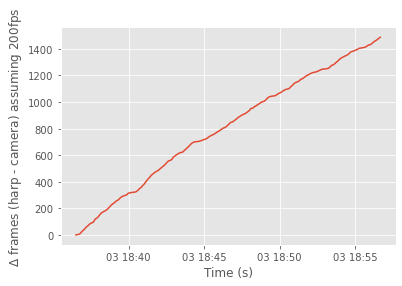

In [58]:
plt.figure()
plt.plot(dataset.streams.BioData.Set.data.index, t_harp-t_camera)
plt.xlabel('Time (s)')
plt.ylabel('$\Delta$ frames (harp - camera) assuming 200fps')
plt.show()

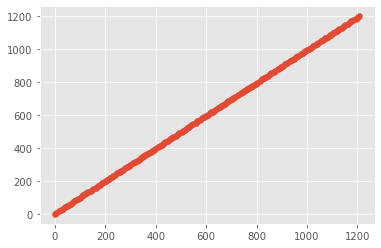

In [53]:
plt.figure()
plt.scatter(t_harp,t_camera)
plt.show()

array([   0.       ,    1.8032   ,    6.5984   ,   25.5984   ,
         39.8032   ,   58.8032   ,   68.0016   ,   85.6      ,
         89.6      ,   95.7984   ,  118.0032   ,  127.9984   ,
        140.       ,  159.8016   ,  172.8016   ,  177.8016   ,
        186.       ,  194.0016   ,  209.2      ,  228.2      ,
        240.2016   ,  256.4      ,  264.4016   ,  281.2032   ,
        292.4016   ,  296.6      ,  300.8      ,  311.6032   ,
        316.5984   ,  318.6016   ,  319.8032   ,  321.8      ,
        322.9984   ,  337.2032   ,  352.2032   ,  357.2032   ,
        370.4016   ,  378.4016   ,  401.6      ,  420.6      ,
        434.6      ,  448.7984   ,  464.7984   ,  478.0032   ,
        484.1984   ,  494.1984   ,  511.       ,  518.       ,
        530.1984   ,  541.4032   ,  556.3984   ,  561.4      ,
        569.2016   ,  585.2016   ,  591.2016   ,  600.4      ,
        612.5984   ,  619.6      ,  622.8      ,  631.6032   ,
        648.6032   ,  666.6032   ,  687.6032   ,  693.6